In [ ]:
# 데이터를 가져오기 위한 경로 설정
%cd current_studying/Practical_Statistics_for_Data_Scientists/data

In [1]:
# 고전 통계학
    # 추론 --> 적은 표본(샘플)을 가지고 더 큰 모집단에 대한 결론을 도출하기 위한 복잡한 과정
    
# 데이터 과학에서 가장 중요한 도전
    # 폭발적인 양의 원시(가공되지 않은) 데이터를 활용 가능한 형태의 정보로 변환하는 것
    # 원시 데이터 --> 정형화된 데이터 

In [ ]:
# 데이터의 유형 파악하기
    # 수치형
        # 연속형
        # 이산형 : 정수형으로 구분되는 값
    # 범주형
        # 이진 : ex) 불리언
        # 순서형 : 분명한 순서가 있는 범주형 데이터. 
        
# 데이터 과학 프로젝트이 목적 ==> 대부분 어떤 "결과"를 예측하는 데 있음.
    # 실험이나 연구에서 결과를 예측하기 위해 피처를 사용함. (피처 = 변수)
    # 각 열은 하나의 레코드를 의미. (레코드 = 사건)
    # 데이터 분석이나 모델리을 하기 위해서 데이터를 불러올 때 하나의 테이블 형태로 변환시켜야 함
        # 이것 때문에 데이터를 불러오고 나서 pandas의 데이터 프레임으로 형식을 변환. 
        # ex) pd.DataFrame(), pd.Series()
    # 지표변수가 결과변수가 될 수 있음. 
        # ex) 경매 결과 0, 1 ==> 모델의 학습/예측/평가때 이진 분류의 결과 변수가 될 수 있음. 
        

**1.3 위치 추정**

In [ ]:
# 측정 지표와 추정값
# 데이터로부터 얻은 값과 실제 상태를 나타내는 이론적인 참값을 구분하기 위해
    # 통계학자 -> 추정값 (estimate)
    # 데이터 분석가 -> 측정지표 (metric)
# why?
    # 통계학 -> 불확실성을 이해하고자 함  ==> "추정한다"
    # 데이터 과학 -> 구체적인 비즈니스나 조직의 목표에 관심을 둠.  ==> "측정한다"

In [ ]:
# 대푯값
    # 평균 
        # 절사평균 : 양끝에서 일정한 개수의 값들을 제외한 뒤 남은 값들을 가지고 평균을 구함. 
        # 가중평균 : 각 데이터 값 x에 사용자가 지정한 가중치 w를 곱한 값들의 총합을 다시 가중치의 합으로 나눔. 
            # 가중치 ex). 데이터가 부족한 소수 그룹에 대해 더 높은 가중치를 적용할 필요가 있을 수 있음. 
    # 중간값 
        # 많은 경우에 데이터에 매우 민감한 평균보다는 중간값이 위치 추정에 유리
        # 가중 중간값 :
            # 어떤 위치를 기준으로 상위 절반의 가중치의 합이 하위 절반의 가중치의 합과 동일한 위치의 값이 됨.
            # 중간값과 마찬가지로 특잇값에 "로버스트" 함. 
            
# 특잇값 
    # 어떤 데이터 집합에서 다른 값들과 매우 멀리 떨어져 있는 값들 
    # 로버스트한 위치를 추정하는 방법
        # 중간값
        # 절사평균 : 데이터가 너무 작지만 않다면 특잇값으로부터 데이터를 보호할 수 있음. 


In [10]:
# 데이터
import pandas as pd
state = pd.read_csv('/Users/wonbinchoi/current_studying/Practical_Statistics_for_Data_Scientists/data/state.csv')

# 절사 평균 구하는 코드
from scipy.stats import trim_mean
print("인구 평균 : ", np.mean(state['Population']))
print("인구 절사 평균 : ", trim_mean(state['Population'], .1)) # .1 ==> 각 끝에서 10%씩 제외한다. 
print('인구 중간값 : ', np.median(state['Population']))

# 가중 평균
# 미국 전체의 평균적인 살인율을 계산하기 위해서는 주마다 다른 가중치를 부여 
import numpy as np
print("\n살인율 평균 : ", np.mean(state['Murder.Rate']))
print("살인율 가중 평균 : ", np.average(state['Murder.Rate'], weights=state['Population']))
print("살인율 중간값 : ", np.median(state['Murder.Rate']))

인구 평균 :  6162876.3
인구 절사 평균 :  4783697.125
인구 중간값 :  4436369.5

살인율 평균 :  4.066
살인율 가중 평균 :  4.445833981123393
살인율 중간값 :  4.0


**1.4 변이 추정**

In [ ]:
# 편차 : 평균과 실젯값의 차이
# 분산 : 편차 제곱 합의 평균을 구한 것
# 표준 편차 : 분산에 root

# 분산, 표준편차, 평균절대편차 ==> 특잇값과 극단값에 로버스트 하지 않음
# 중위절대편차 ==> 로버스트함. 

In [34]:
# 순서통계량 : 정렬 데이터를 나타내는 통계량
    # 범위 : 기본이 되는 측도 (가장 큰 값과 작은 값의 차이)

# IQR (사분위범위수) : 25번째 백분위수와 75번째 백분위수의 차이 
print("표준편차 : ", np.std(state['Population']))
print('분산 : ', np.var(state['Population']))


표준편차 :  6779407.114632265
분산 :  45960360825926.56


**1.5 데이터 분포 탐색하기**

In [36]:
# 사분위수 
state['Murder.Rate'].quantile([.05, .25])

0.05    1.600
0.25    2.425
Name: Murder.Rate, dtype: float64

In [2]:
# 사분위수 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.boxplot(state['Population']/1000000)
plt.ylabel('Population (millions)')
plt.show()

# # 결과 ==> 주별 인구의 중간값이 약 500만이고, 주 "절반"이 약 200만에서 700만 사이이며,
# #         인구 수가 높은 이상치가 있음을 알 수 있음. 

In [68]:
# 도수분포표 & 히스토그램 
import pandas as pd
binnedPopulation = pd.cut(state['Population'], 10) # 10개의 구간으로 나눈것임
                                                   # quantile은 각 구간의 똑같은 개수의 데이터가 들어있도록 한 것임. 
pd.DataFrame(binnedPopulation.value_counts()) # ==> 도수 분포표. 

,Population
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0
"(29915890.0, 33584923.0]",0


Text(0, 0.5, 'states count')

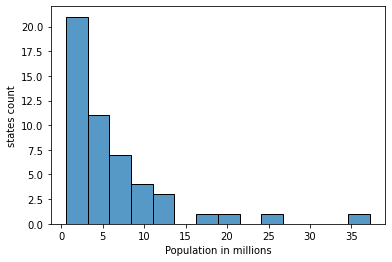

In [53]:
# 히스토그램으로 알 수 있는 것 (히스토그램 ==> 도수분포표를 시각화한것.)
    # 1. 그래프에 빈 구간들이 있을 수 있다.
    # 2. 구간은 동일한 크기를 가진다. 
    # 3. 빈 구간이 있지 않은 이상, 막대 사인느 공간 없이 서로 붙어 있음. 
sns.histplot(
    x=state['Population']/1000000,
)
plt.xlabel('Population in millions')
plt.ylabel('states count')

<AxesSubplot:xlabel='Murder.Rate', ylabel='Count'>

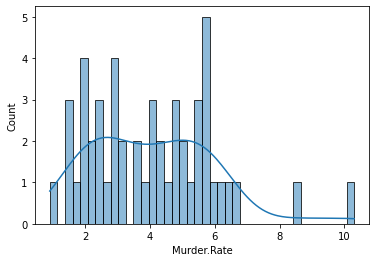

In [60]:
# 밀도 그림과 추정 : 데이터의 분포를 연속된 선으로 보여줌.
# ==> 부드러운 히스토그램. 
sns.histplot(x=state['Murder.Rate'], kde=True, bins=40)

**1.6 이진 데이터와 범주 데이터 검색하기**

In [73]:
dfw_df = pd.read_csv('./dfw_airline.csv')
dfw_df

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


<AxesSubplot:>

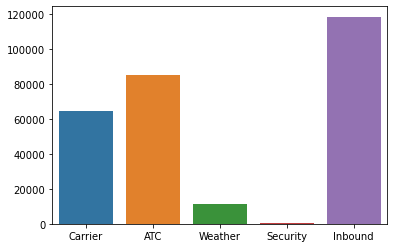

In [72]:
# 히스토그램의 x축은 범주 
# 막대도표의 x축은 수치적으로 나타낼 수 있는 각각 별개의 변수의 값. 
sns.barplot(data=dfw_df)

**1.7 상관관계**

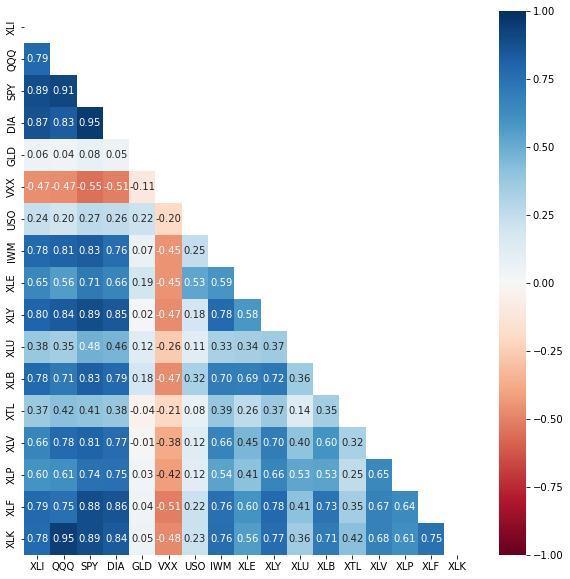

In [93]:
sp500_px = pd.read_csv('sp500_data.csv.gz', index_col='Unnamed: 0')
sp500_sym = pd.read_csv('sp500_sectors.csv')

etfs = sp500_px.loc[
    sp500_px.index > '2012-07-01', 
    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']
]

plt.figure(figsize=(10,10))
sns.heatmap(
    etfs.corr(),
    vmin=-1, vmax=1,
    cmap='RdBu',
    mask = np.triu(np.ones_like(etfs.corr())),
    annot=True, fmt='.2f'
)
plt.show()

In [ ]:
sns.PairGrid(data=)

In [99]:
sp500_sym[sp500_sym['sector'] == 'etf']['symbol']

315    XLI
316    QQQ
317    SPY
318    DIA
319    GLD
320    VXX
321    USO
322    IWM
323    XLE
324    XLY
325    XLU
326    XLB
327    XTL
328    XLV
329    XLP
330    XLF
331    XLK
Name: symbol, dtype: object

**1.8 두개 이상의 변수 탐색하기**

In [ ]:
# 일변량분석 ==> 평균, 분산
# 이변량분석 ==> 상관관계
# "다변량분석" 
    # 분할표 
    # 육각형 구간
    # 등고 도표
    # 바이올린 도표

In [5]:
%cd ./data

/Users/wonbinchoi/current_studying/Practical_Statistics_for_Data_Scientists/data


In [6]:
import pandas as pd
kc_tax = pd.read_csv('kc_tax.csv.gz')
kc_tax0 = kc_tax.loc[(kc_tax['TaxAssessedValue'] < 750000) & (kc_tax['SqFtTotLiving'] > 100) \
& (kc_tax['SqFtTotLiving'] < 3500), :]
kc_tax0.shape

(432693, 3)

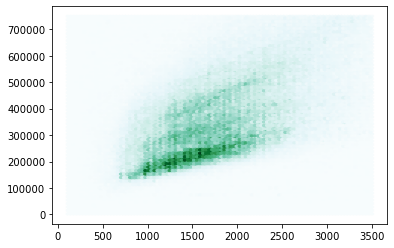

In [7]:
plt.hexbin(
    data=kc_tax0,
    x='SqFtTotLiving',
    y='TaxAssessedValue',
    cmap='BuGn'
)

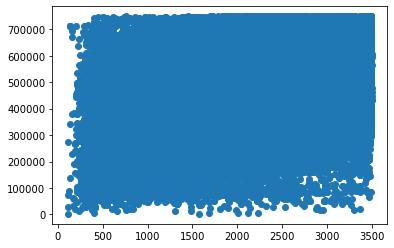

In [8]:
plt.scatter(
    data=kc_tax0,
    x='SqFtTotLiving',
    y='TaxAssessedValue',
)

<AxesSubplot:xlabel='SqFtTotLiving', ylabel='TaxAssessedValue'>

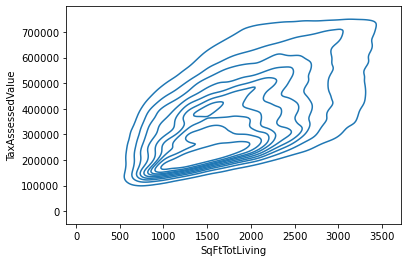

In [9]:
sns.kdeplot(
    data=kc_tax0,
    x='SqFtTotLiving',
    y='TaxAssessedValue',
)

In [17]:
airline_df = pd.read_csv('airline_stats.csv')
airline_df.head()



,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


**1.8.4  다변수 시각화하기**

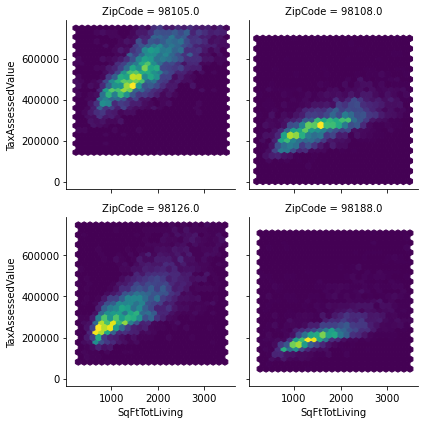

In [54]:
zipcodes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0['ZipCode'].isin(zipcodes)]

def hexbin(x,y,**kwargs):
#     cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x,y,
               gridsize=25, 
#                cmap=cmap, 
#                **kwargs
              )

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', )
# 아래의 경우는 안되는데..?
# g.map(plt.hexbin, 'SqFtTotLiving', 'TaxAssessedValue', )

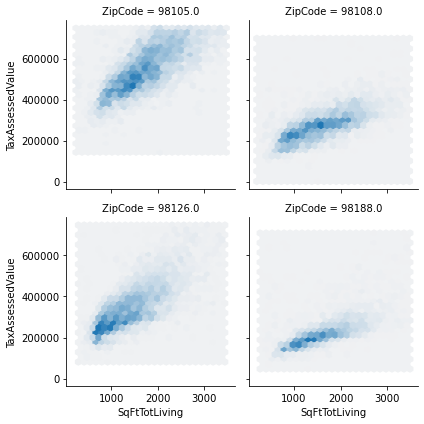

In [55]:
zipcodes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0['ZipCode'].isin(zipcodes)]

def hexbin(x,y,color,**kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x,y,
               gridsize=25, 
               cmap=cmap, 
               **kwargs
              )

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', )
